In [71]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Data Visualization in Seaborn

There is no doubt that data visualization is a vital component in the data professional's workflow, especially when communicating final insights or data science models to the client.  But visualization is also used iteratively in the early stages of a project during exploration, transformation and cleaning.  When combined with [dataframe manipulation](https://medium.com/@joelmsherman/adventures-in-python-15fd17ca211e) and [merging](https://medium.com/@joelmsherman/the-basics-of-merging-dataframes-4e3f429bb65b), data visualization can become the backbone of a healthy exploratory data analysis (EDA) process.  In a [previous article](https://medium.com/@joelmsherman/basic-data-viz-with-matplotlib-602c885f8093) I wrote about some of the basics in visualizing data with Matplotlib.  In this article, I will do the same with Seaborn.  In particular, I will cover the following:

1. Basic Plotting Functions in Seaborn 
2. Adding more than Two Dimensions to a Seaborn Plot
3. Basic Plot Customization in Seaborn

As with my previous blog posts, I'll be using personal data on my sleep, bicycle training and recovery which is available on my public GitHub account, [here](https://github.com/joelmsherman/explain_Seaborn/blob/master/STR.csv).

In [72]:
# Note: Data file STR.csv was wrangled, cleaned and transformed in another notebook
# Read Data
df = pd.read_csv('https://raw.githubusercontent.com/joelmsherman/explain_Seaborn/master/STR.csv')

## 1. Basic Plot Functions

Seaborn has two primary facet grid plot object functions, the use of which will depend on the nature of your data.  

### Relational Plots

The first function is .relplot(), which will call relational plots, such as scatter plots and line plots.  Relational plots show the relationship between two (or more) quantitative variables.  When one of those variables is a datetime object, Seaborn's relplot can produce a line chart.  For example, to look at how my average heart rate variability (AvgHRV) varies over time (date), I can write `sns.relplot(x = 'date', y = 'AvgHRV', data = df, kind = 'line')` to produce the plot in Figure 1.

For other types of quantitative variables, .relplot() can produce a scatter plot to visualize the relationship.  In my example, I'd like to look at the relationship between my AvgHRV and the amount of deep, slow-wave sleep that I get at night (Deep).  Again, Seaborn can handle this with one line `sns.relplot(x = 'Deep', y = 'AvgHRV', data = df, kind = 'scatter')`to produce the plot in Figure 2.

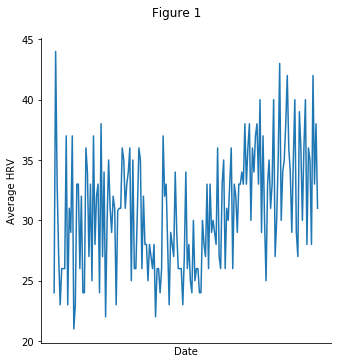

In [73]:
# Relationship between time and Average HRV
g = sns.relplot(x = 'date',
                y = 'AvgHRV',
                data = df,
                kind = 'line')
g.set(ylabel = 'Average HRV', xlabel = 'Date', xticklabels = [], xticks = [])
g.fig.suptitle('Figure 1', y=1.05)
plt.savefig('line.png')

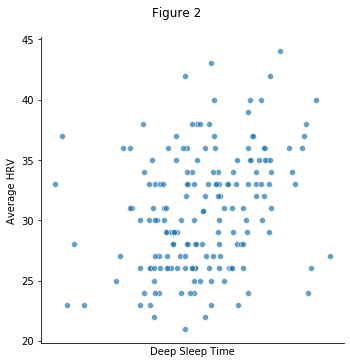

In [74]:
# Relationship between Deep Sleep and Average HRV
g = sns.relplot(x = 'Deep',
                y = 'AvgHRV',
                data = df,
                kind = 'scatter',
                alpha = .7)
g.set(ylabel = 'Average HRV', xlabel = 'Deep Sleep Time', xticks = [])
g.fig.suptitle('Figure 2', y=1.05)
plt.savefig('scatter.png')

### Categorical Plots

The second plotting function in Seaborn is .catplot(), which will call categorical plots such as bar plots, box plots, count plots and point plots.  These types of plots show the distribution of a quantitative variable within categories defined by a categorical variable.  For example, to look at how my AvgHRV varies based on whether I drank 1 (a little), 2 (too much) or 0 (nothing) beers the night before (Beers),  I can write `sns.catplot(x = 'Beers', y = 'AvgHRV', data = df, kind = 'box')` to execute the boxplot in Figure 3.

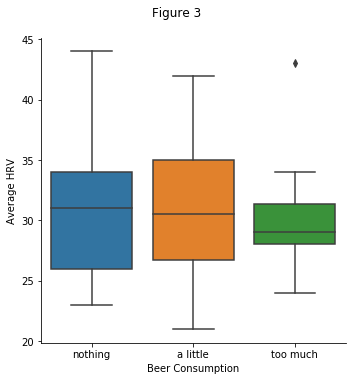

In [75]:
# Relationship between Beer consumption and Average HRV
g = sns.catplot(x = 'Beers',
                y = 'AvgHRV',
                data = df,
                kind = 'box')
g.set(ylabel = 'Average HRV', xlabel = 'Beer Consumption')
g.fig.suptitle('Figure 3', y=1.05)
plt.savefig('box.png')

## 2. Adding Multiple Dimensions to Seaborn Plots

Plotting two variables seems easy enough, but what about more?  Here again, Seaborn doesn't dissapoint, and can plot more than 2 dimensions using a variety of different parameters.  For example, the **hue** and **size** arguments can be used to alter the scatter plot in Figure 2 to add a third dimension (Beers) to see if the relationship between deep sleep and HRV changes with beer consumption.  This line `sns.relplot(x = 'Deep', y = 'AvgHRV', data = df, kind = 'scatter' hue = 'Beers', size = 'Beers')` will produce the plot in Figure 4.  Other arguments like **col** and/or **row** can create subplots or small multiples along a third or fourth dimension.  Seaborn makes this easy, the result is a powerful set of tools for exploring and visualizing your data. 

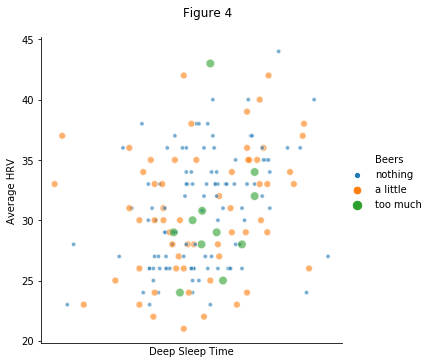

In [76]:
# Relationship between Beer Consumption, Deep Sleep and Average HRV - Hue
g = sns.relplot(x = 'Deep',
                y = 'AvgHRV',
                data = df,
                kind = 'scatter',
                hue = 'Beers',
                size = 'Beers',
                size_order = ['too much', 'a little', 'nothing'],
                alpha = .6)
g.set(ylabel = 'Average HRV', xlabel = 'Deep Sleep Time', xticks = [])
g.fig.suptitle('Figure 4', y=1.05)
plt.savefig('scatter2.png')

## Basic Plot Customization

Customizing plots in Seaborn is very simple as well.  In this final section I'll cover customizations of plot **backgrounds**, element **color pallettes**, the **scale** of Seaborn plots, and how to add **titles**.  

### Background  

To change the background style of a Seaborn plot, use the `set_style()` method, along with a paramter for the style.  Seaborn has five (5) styles for you to choose from:  'white' (default, pictured in Figures 1 to 4 above), 'dark' (makes grey background), 'whitegrid' (same as 'white' but with grey gridlines), 'darkgrid' (same as 'dark' but with white gridlines) and 'ticks' (same as 'white' but adds tick marks to the x and y axis).   

### Color Pallettes

To change the color pallette of the main plot elements, use Seaborn's `set_pallette()` method, and pass in a pallette parameter.  There are many types of pallette parameters in Seaborn.  Diverging pallettes like 'RdBu' or 'PRGn' will color the elements on diverging scales of red to blue, or purple to green, respectively.  Diverging pallettes are typically used when comparing elements, as the values diverge from a central value, like zero, or the mean of a variable.  In contrast, sequential pallette parameters like 'greys' or 'blues' will color the elements varying shades of grey or blue, respectively, and are great when working with variables that have continuous scales.  And if you want to use a custom pallette, Seaborn allows you to pass your own list of colors or even hex codes, like `['color/hex 1', 'color/hex 2'...]`.

### Scale

By default, Seaborn assumes that you want to visualize your data at the scale of a typical paper publication.  But there are some instances when you need your plots to be larger!  Seaborn's `set_context()` method allows you to do just that, by passing in a context parameter. In addition to the default 'paper' context parameter, you can use 'notebook' (slightly larger than paper, great for Jupyter notebooks!), 'talk' (perfect for presentations), or 'poster' (the largest scale of all!).  

### Titles

Finally, no plot is complete without an appropriate title.  To add titles to facet grid objects like replots and catplots in Seaborn, we first assign the plot to a variable, say g `g = sns.relplot(...)` and then call `g.fig.suptitle('Your Plot Title')`.  For small multiples that invoke the **col** or **row** parameters, you can also title your subplots using `g.set_titles('Subtitle of Group {row/col name}')` and Seaborn will set the titles of the subplots in your col or row dimension accordingly.  

I hope you enjoyed reading this blog as much as I enjoyed writing it, and get something out of it as a Seaborn beginner.  Now go forth and code! 